##  Calculating price and delta of a European options uisng Black-Scholes Model

Pricing European options and calculate thier Delta using the Black-Scholes model

#### Price vs. Stock Price
 - Call options become more valuable as the stock price increases.
 - Put options become more valuable as the stock price decreases.

The price is convex due to time value and the nonlinear payoff of options.

#### Option Prices vs Underlying Asset Price
- Call Option: Increases monotonically with stock price
- Put Option: Decreases as stock price increases
- Strike Price (K): Point where options transition between in/out-of-the-money
- Intrinsic Value: Options approach intrinsic value near expiration

In [10]:
### Implement the Black-Scholes formula for price and Delta.
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

def black_scholes_price_delta(S, K, T, r, sigma, option_type='call'):

    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)
        delta = si.norm.cdf(d1)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1)
        delta = -si.norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
        
    return price, delta

### Delta vs. Stock Price
Call Delta: Ranges from 0 to 1.
- Near 0 when far out-of-the-money (stock ≪ strike).
- Near 1 when deep in-the-money (stock ≫ strike).

Put Delta: Ranges from -1 to 0.
- Near -1 deep in-the-money.
- Near 0 out-of-the-money.

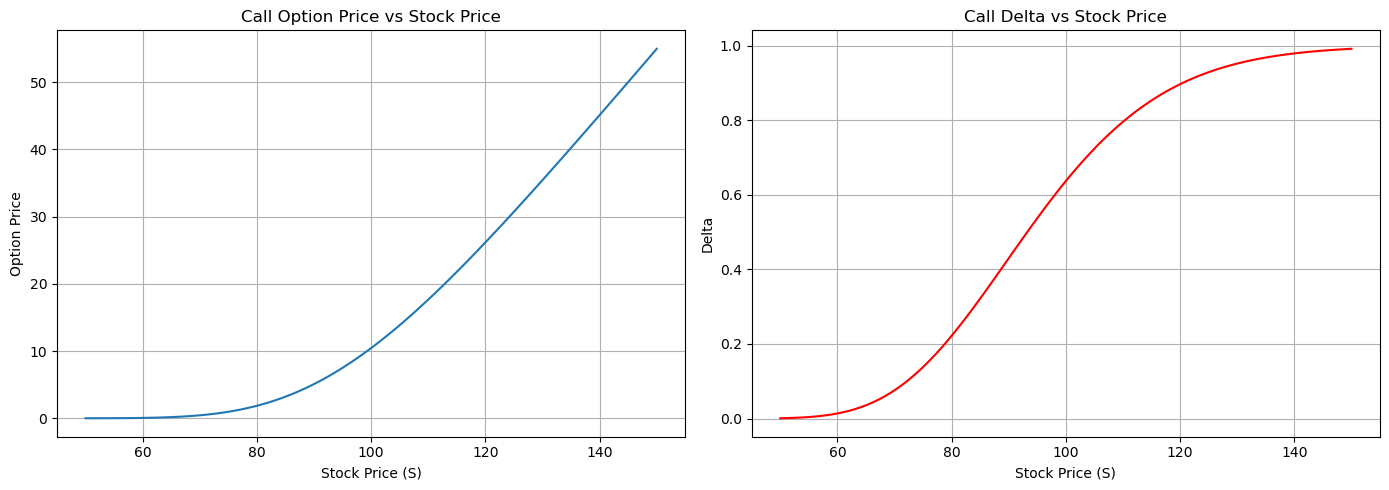

In [17]:
# Parameters
K = 100        # Strike price
T = 1.0        # Time to maturity (in years)
r = 0.05       # Risk-free interest rate
sigma = 0.2    # Volatility (20%)
S_range = np.linspace(50, 150, 100)  # Stock price range

def plot_price_and_delta_vs_S(S_range, K, T, r, sigma, option_type):
    prices, deltas = [], []

    for S in S_range:
        price, delta = black_scholes_price_delta(S, K, T, r, sigma, option_type)
        prices.append(price)
        deltas.append(delta)

# Plot Price and Delta ---------------------
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    ax[0].plot(S_range, prices, label='Option Price')
    ax[0].set_title(f'{option_type.capitalize()} Option Price vs Stock Price')
    ax[0].set_xlabel('Stock Price (S)')
    ax[0].set_ylabel('Option Price')
    ax[0].grid(True)
    ax[1].plot(S_range, deltas, label='Delta', color='red')
    ax[1].set_title(f'{option_type.capitalize()} Delta vs Stock Price')
    ax[1].set_xlabel('Stock Price (S)')
    ax[1].set_ylabel('Delta')
    ax[1].grid(True)
    plt.tight_layout()
    plt.show()

# Plot for call option
plot_price_and_delta_vs_S(S_range, K, T, r, sigma, option_type='call')



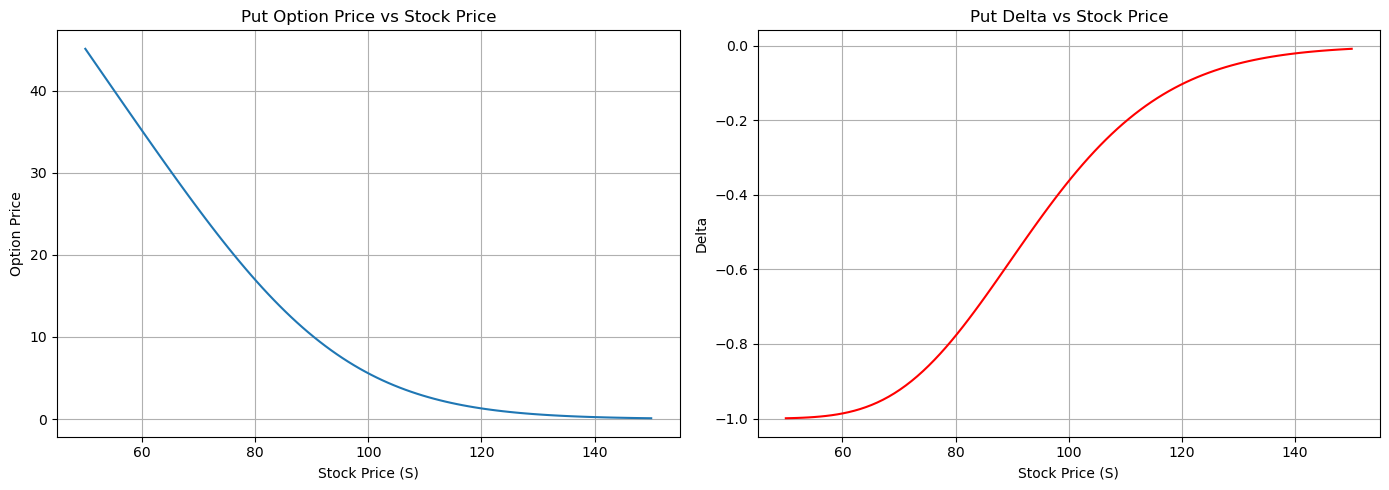

In [18]:
# Plot  for put option
plot_price_and_delta_vs_S(S_range, K, T, r, sigma, option_type='put')

## Delta vs. Time to Maturity

Call Delta:
- Approaches 0 for deep out-of-the-money options
- Increases to 1 for deep in-the-money options
- Changes most rapidly near strike price (high gamma)
- 
Put Delta:
- Ranges from -1 (deep ITM) to 0 (deep OTM)
- Mirror image of call delta shifted down by 1

Delta at Moneyness:
- At-the-money: Call delta ≈ 0.5, Put delta ≈ -0.5

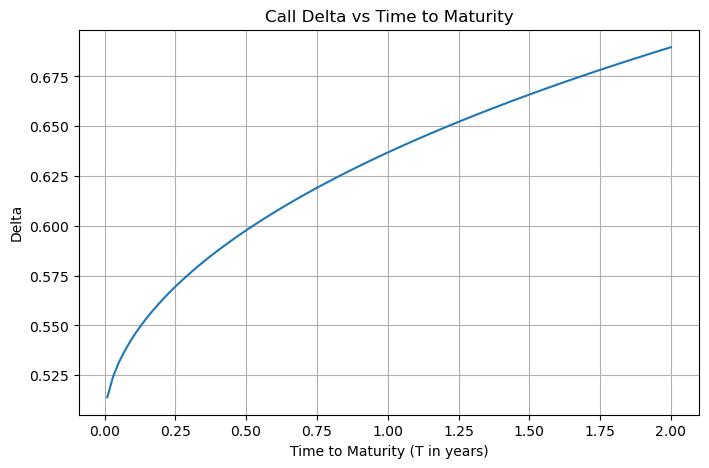

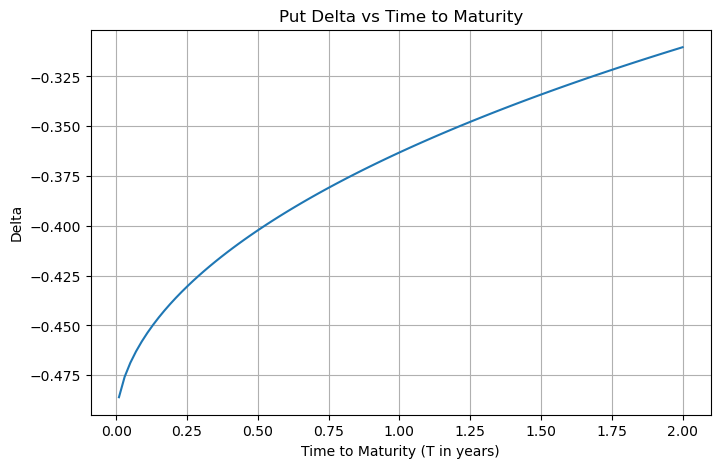

In [19]:
def plot_delta_vs_time(S, K, r, sigma, option_type):
    T_range = np.linspace(0.01, 2, 100)
    deltas = []

    for T in T_range:
        _, delta = black_scholes_price_delta(S, K, T, r, sigma, option_type)
        deltas.append(delta)

    plt.figure(figsize=(8, 5))
    plt.plot(T_range, deltas, label='Delta')
    plt.title(f'{option_type.capitalize()} Delta vs Time to Maturity')
    plt.xlabel('Time to Maturity (T in years)')
    plt.ylabel('Delta')
    plt.grid(True)
    plt.show()

# Example: At-the-money option
plot_delta_vs_time(S=100, K=100, r=r, sigma=sigma, option_type='call')
plot_delta_vs_time(S=100, K=100, r=r, sigma=sigma, option_type='put')


### Plot for 3D Surface (Price & Delta)
- It is shows how price and delta jointly vary with both stock price and time.
- Delta surface is steepest around the strike price and close to expiry.
    

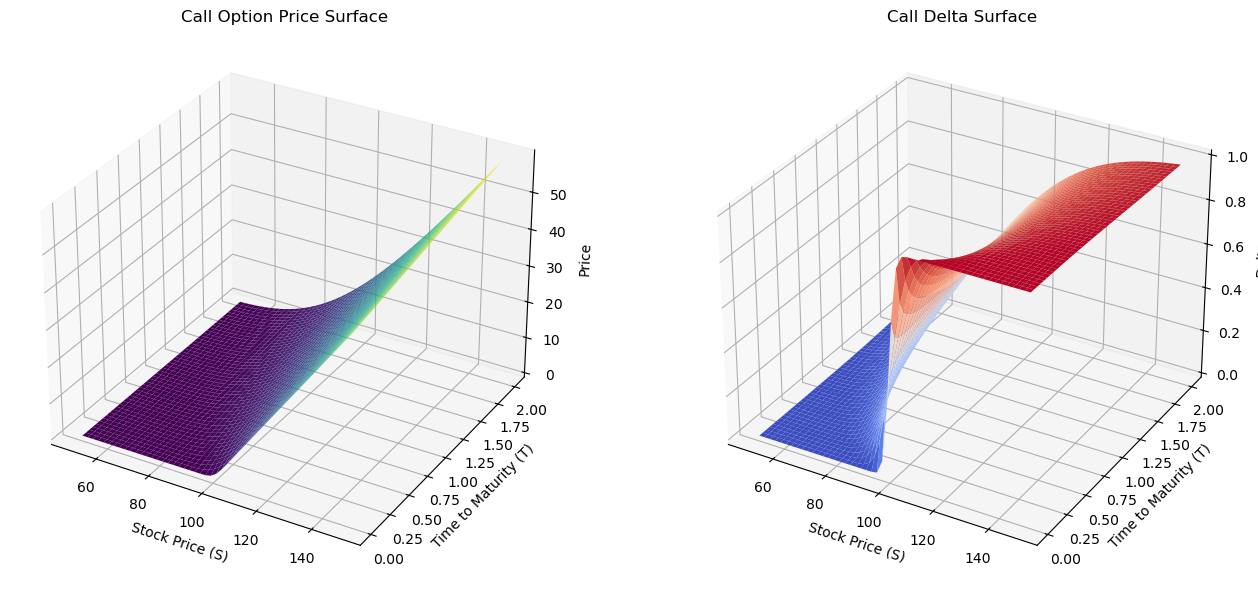

In [20]:
def plot_3d_surface(K, r, sigma, option_type='call'):
    S = np.linspace(50, 150, 50)
    T = np.linspace(0.01, 2.0, 50)
    S_grid, T_grid = np.meshgrid(S, T)
    price_grid = np.zeros_like(S_grid)
    delta_grid = np.zeros_like(S_grid)

    for i in range(len(S)):
        for j in range(len(T)):
            price, delta = black_scholes_price_delta(S[i], K, T[j], r, sigma, option_type)
            price_grid[j, i] = price
            delta_grid[j, i] = delta

    fig = plt.figure(figsize=(14, 6))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(S_grid, T_grid, price_grid, cmap='viridis')
    ax1.set_title(f'{option_type.capitalize()} Option Price Surface')
    ax1.set_xlabel('Stock Price (S)')
    ax1.set_ylabel('Time to Maturity (T)')
    ax1.set_zlabel('Price')
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(S_grid, T_grid, delta_grid, cmap='coolwarm')
    ax2.set_title(f'{option_type.capitalize()} Delta Surface')
    ax2.set_xlabel('Stock Price (S)')
    ax2.set_ylabel('Time to Maturity (T)')
    ax2.set_zlabel('Delta')
    plt.tight_layout()
    plt.show()

## Plot for 3D Surface of call option
plot_3d_surface(K=100, r=0.05, sigma=0.2, option_type='call')


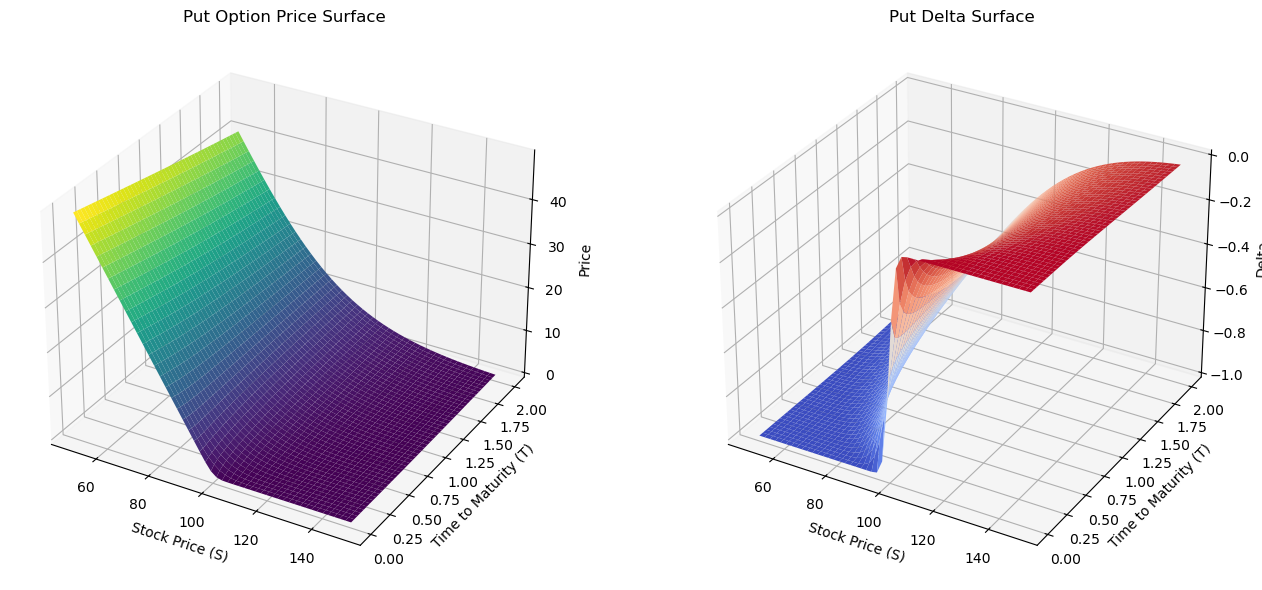

In [21]:
## Plot for 3D Surface of put option
plot_3d_surface(K=100, r=0.05, sigma=0.2, option_type='put')